# Task 1 - Exploration of customer purchasing behavior

### Libraries to import:

In [2]:
import warnings
warnings.filterwarnings("ignore")
#Data Manipulation and Treatment
import numpy as np
import pandas as pd
from datetime import datetime
#Plotting and Visualizations
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from scipy import stats
import itertools
#dvc
import dvc.api
import mlflow
#utils 
import os
import sys
sys.path.append(os.path.abspath(os.path.join('../scripts')))
import plot

In [3]:
def str_to_date(date):
    return datetime.strptime(date, '%Y-%m-%d').date()

### Load the datasets 

In [4]:
def get_data(tag, Fpath, repo='G:/10_academy/Week_3/solution/Pharmaceutical-Sales-Prediction'):
    rev = tag
    path=Fpath
    data_url = dvc.api.get_url(path=path, repo=repo, rev=rev)
    df = pd.read_csv(data_url)
    return df

In [5]:
#The training Set
df_train=get_data('train_v1','data/train.csv')

In [6]:
#The training Set
df_test=get_data('test_v1','data/test.csv')

In [7]:
#The store Set
df_store=get_data('v1','data/store.csv')

#### A quick glimpse at the data on hand:

In [8]:
df_train.head() 

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [9]:
df_train.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1
1017208,1115,2,2013-01-01,0,0,0,0,a,1


In [10]:
df_train.dtypes,print ("The Train dataset has {} Rows and {} Variables".format(str(df_train.shape[0]),str(df_train.shape[1])))

The Train dataset has 1017209 Rows and 9 Variables


(Store             int64
 DayOfWeek         int64
 Date             object
 Sales             int64
 Customers         int64
 Open              int64
 Promo             int64
 StateHoliday     object
 SchoolHoliday     int64
 dtype: object,
 None)

In [11]:
df_test.head() 

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [12]:
df_test.tail()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
41083,41084,1111,6,2015-08-01,1.0,0,0,0
41084,41085,1112,6,2015-08-01,1.0,0,0,0
41085,41086,1113,6,2015-08-01,1.0,0,0,0
41086,41087,1114,6,2015-08-01,1.0,0,0,0
41087,41088,1115,6,2015-08-01,1.0,0,0,1


In [13]:
df_test.dtypes,print ("The Test dataset has {} Rows and {} Variables".format(str(df_test.shape[0]),str(df_test.shape[1])))

The Test dataset has 41088 Rows and 8 Variables


(Id                 int64
 Store              int64
 DayOfWeek          int64
 Date              object
 Open             float64
 Promo              int64
 StateHoliday      object
 SchoolHoliday      int64
 dtype: object,
 None)

In [14]:
df_store.head() 

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [15]:
df_store.tail()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN
1114,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


In [16]:
df_store.dtypes,print ("The Store dataset has {} Rows and {} Variables".format(str(df_store.shape[0]),str(df_store.shape[1])))

The Store dataset has 1115 Rows and 10 Variables


(Store                          int64
 StoreType                     object
 Assortment                    object
 CompetitionDistance          float64
 CompetitionOpenSinceMonth    float64
 CompetitionOpenSinceYear     float64
 Promo2                         int64
 Promo2SinceWeek              float64
 Promo2SinceYear              float64
 PromoInterval                 object
 dtype: object,
 None)

### Check for distribution in both training and test sets 

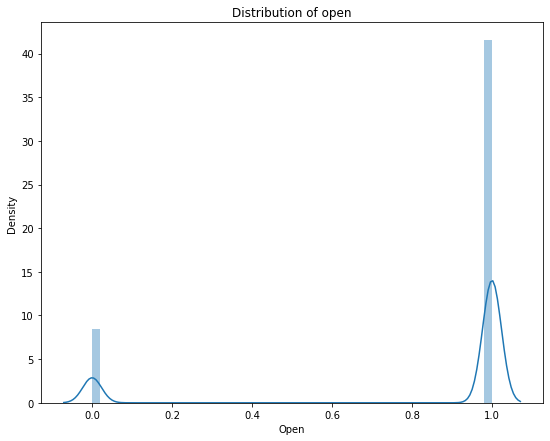

In [18]:
plt.figure(figsize=(9, 7))
sns.distplot(df_train['Open']).set_title(f'Distribution of open')
plt.show()

In [21]:
df_train.Promo.describe() 

count    1.017209e+06
mean     3.815145e-01
std      4.857586e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.000000e+00
max      1.000000e+00
Name: Promo, dtype: float64

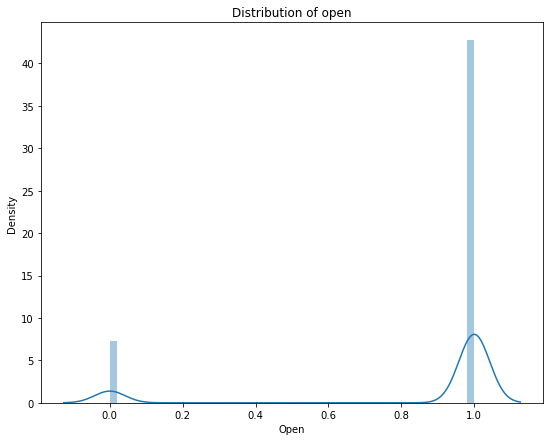

In [19]:
plt.figure(figsize=(9, 7))
sns.distplot(df_test['Open']).set_title(f'Distribution of open')
plt.show()


In [20]:
df_test.Promo.describe() 

count    41088.000000
mean         0.395833
std          0.489035
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: Promo, dtype: float64

### Data Wrangling and Exploration:

How many missing fields each variable has:

In [22]:
df_train.count(0)/df_train.shape[0] * 100

Store            100.0
DayOfWeek        100.0
Date             100.0
Sales            100.0
Customers        100.0
Open             100.0
Promo            100.0
StateHoliday     100.0
SchoolHoliday    100.0
dtype: float64

* We can see that the the columns have got a good fill rate. We don't need to do any change for the train set for now at least.

In [23]:
print ()
print ("-Over those two years, {} is the number of times that different stores closed on given days.".format(df_train[(df_train.Open == 0)].count()[0]))
print ()
print ("-From those closed events, {} times occured because there was a school holiday. " .format(df_train[(df_train.Open == 0) & (df_train.SchoolHoliday == 1)&(df_train.StateHoliday == '0') ].count()[0]))
print ()
print ("-And {} times it occured because of either a bank holiday or easter or christmas.".format(df_train[(df_train.Open == 0) &
         ((df_train.StateHoliday == 'a') |
          (df_train.StateHoliday == 'b') | 
          (df_train.StateHoliday == 'c'))].count()[0]))
print ()
print ("-But interestingly enough, {} times those shops closed on days for no apparent reason when no holiday was announced. In fact, those closings were done with no pattern whatsoever and in this case from 2013 to 2015 at almost any month and any day.".format(df_train[(df_train.Open == 0) &
         (df_train.StateHoliday == "0")
         &(df_train.SchoolHoliday == 0)].count()[0]))
print ()


-Over those two years, 172817 is the number of times that different stores closed on given days.

-From those closed events, 2263 times occured because there was a school holiday. 

-And 30140 times it occured because of either a bank holiday or easter or christmas.

-But interestingly enough, 121482 times those shops closed on days for no apparent reason when no holiday was announced. In fact, those closings were done with no pattern whatsoever and in this case from 2013 to 2015 at almost any month and any day.



    * Since  we don't want  to bias our  decision tree models to consider those exceptions, the best solution here is to get rid of closed stores and prevent the models to train on them and get false guidance.
    *In this case we will analyse only open stores since a close store yield a profit of 0.

In [24]:
df_train=df_train.drop(df_train[(df_train.Open == 0) & (df_train.Sales == 0)].index)

In [25]:
#making sure the indexes are back to [0,1,2,3 etc.] 
df_train = df_train.reset_index(drop=True) 

In [26]:
print ("Our new training set has now {} rows ".format(df_train.shape[0]))

Our new training set has now 844392 rows 


### What about the distribution of Sales and Customers in the train set and test set? Any outliers?

#### 1) Sales:

In [27]:
df_train.Sales.describe() 

count    844392.000000
mean       6955.514291
std        3104.214680
min           0.000000
25%        4859.000000
50%        6369.000000
75%        8360.000000
max       41551.000000
Name: Sales, dtype: float64

we see here a minimum of 0 which means some stores even opened got 0 sales on some days.

In [28]:
df_train=df_train.drop(df_train[(df_train.Open == 1) & (df_train.Sales == 0)].index)
df_train = df_train.reset_index(drop=True) 

{'Mean': 6955.959133664481, 'Median': 6369.0}

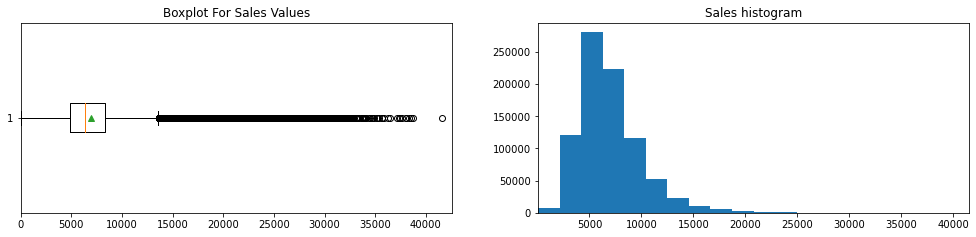

In [29]:
fig, axes = plt.subplots(1, 2, figsize=(17,3.5))
axes[0].boxplot(df_train.Sales, showmeans=True,vert=False)
axes[0].set_xlim(0,max(df_train["Sales"]+1000))
axes[0].set_title('Boxplot For Sales Values')
axes[1].hist(df_train.Sales, cumulative=False, bins=20)
axes[1].set_title("Sales histogram")
axes[1].set_xlim((min(df_train.Sales), max(df_train.Sales)))

{"Mean":np.mean(df_train.Sales),"Median":np.median(df_train.Sales)}

In [30]:
print ("{0:.2f}% of the time Rossman are actually having big sales day (considered outliers).".format(df_train[df_train.Sales>14000].count()[0]/df_train.shape[0]*100))
print ("{0:.2f}% of the time Rossman are actually having no sales at all.".format(df_train[df_train.Sales==0].count()[0]/df_train.shape[0]*100))

3.21% of the time Rossman are actually having big sales day (considered outliers).
0.00% of the time Rossman are actually having no sales at all.


#### Findings:   
    * Some exceptions (the outliers) in the boxplot had to be checked to see if it's wrong inputted data
    * An  important  metric  to  always check when looking at a distribution is how the mean compares to the median and how close are they from each other.  As we see here a mean of 6955 versus 6369 in median is a very good sign that there are no extravagant values affecting the general distribution of Sales.
    
    

#### 2) Customers:

In [31]:
df_train.Customers.describe() 

count    844338.000000
mean        762.777166
std         401.194153
min           8.000000
25%         519.000000
50%         676.000000
75%         893.000000
max        7388.000000
Name: Customers, dtype: float64

{'Mean': 762.777166253325, 'Median': 676.0}

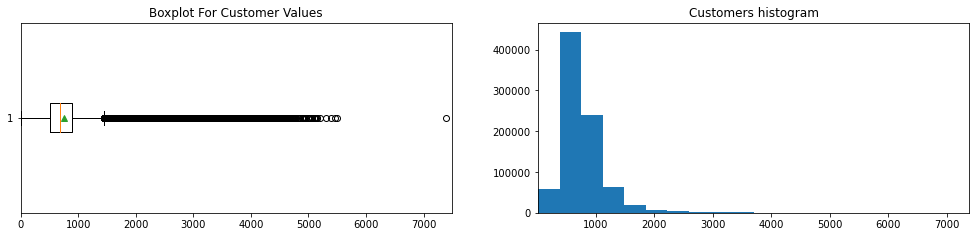

In [32]:
fig, axes = plt.subplots(1, 2, figsize=(17,3.5))
axes[0].boxplot(df_train.Customers, showmeans=True,vert=False)
axes[0].set_xlim(0,max(df_train["Customers"]+100))
axes[0].set_title('Boxplot For Customer Values')
axes[1].hist(df_train.Customers, cumulative=False, bins=20)
axes[1].set_title("Customers histogram")
axes[1].set_xlim((min(df_train.Customers), max(df_train.Customers)))

{"Mean":np.mean(df_train.Customers),"Median":np.median(df_train.Customers)}

In [33]:
print ("{0:.2f}% of the time Rossman are actually having customers more than usual (considered outliers).".format(df_train[df_train.Customers>1500].count()[0]/df_train.shape[0]*100))
print ("{0:.2f}% of the time Rossman are actually having no customers at all.".format(df_train[df_train.Customers==0].count()[0]/df_train.shape[0]*100))

4.37% of the time Rossman are actually having customers more than usual (considered outliers).
0.00% of the time Rossman are actually having no customers at all.


In [34]:
df_train[df_train.Customers>7000]

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
825160,817,2,2013-01-22,27190,7388,1,1,0,0


In [35]:
stats.pearsonr(df_train.Customers, df_train.Sales)[0]

0.823551720200021

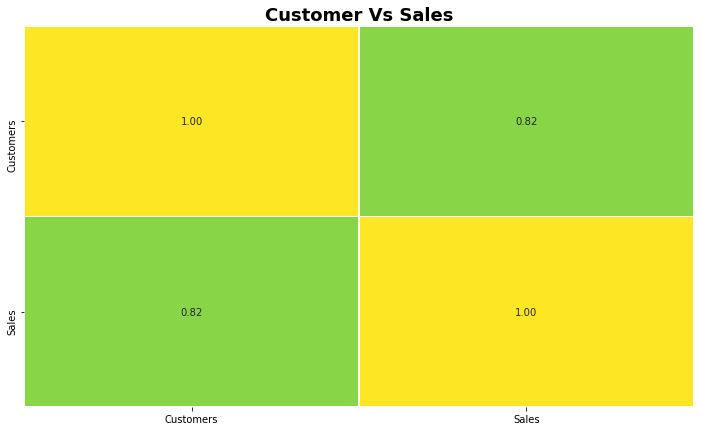

In [36]:
cor=df_train[['Customers','Sales']].corr()
plot.plot_heatmap(cor, 'Customer Vs Sales')

#### Findings
    *We can see similair patterns with the customers column and the Sales column, in fact our pearson correlation factor of 0.82 explains that there is a strong positive correlation between Sales and Customers. In general, the more customers you have in a store, the higher your sales for the day.

    *We see that on a specific day there was a huge amount of customers in a store
    
    *We observe a right skewness in both distributions because of the low number of outliers but the high representation of each outlier alone which pushes the distribution to the lefta as seen in both histograms.This typically occurs when the mean is higher than the median.

### A closer look at the Store Dataset:

In [37]:
df_store.count(0)/df_store.shape[0]* 100

Store                        100.000000
StoreType                    100.000000
Assortment                   100.000000
CompetitionDistance           99.730942
CompetitionOpenSinceMonth     68.251121
CompetitionOpenSinceYear      68.251121
Promo2                       100.000000
Promo2SinceWeek               51.210762
Promo2SinceYear               51.210762
PromoInterval                 51.210762
dtype: float64

#### Findings:
    * The Promo2SinceWeek,Promo2SinceYear and PromoInterval variables has 51% fill rate since they are actually NULL values because there are no continuous promotion for those stores.

    * Instead  for CompetitionOpenSinceMonth  and CompetitionOpenSinceYear,  it's basically missing data that we're dealing with here (68.25% fill rate), this means that we have the nearest distance of the competitor but miss the date information on when did he actually opened next to the Rossman store.

##### Let's start the cleansing process by order:

###### 1) CompetitionDistance:

In [38]:
df_store[pd.isnull(df_store.CompetitionDistance)] 

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
290,291,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN
621,622,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
878,879,d,a,NaN,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov"


#rows with missing values for Competition Distance, only 3 rows with null which makes sense since 99.73% is filled

{'Mean': 5404.901079136691,
 'Median': 2325.0,
 'Standard Dev': 7659.7282732764415}

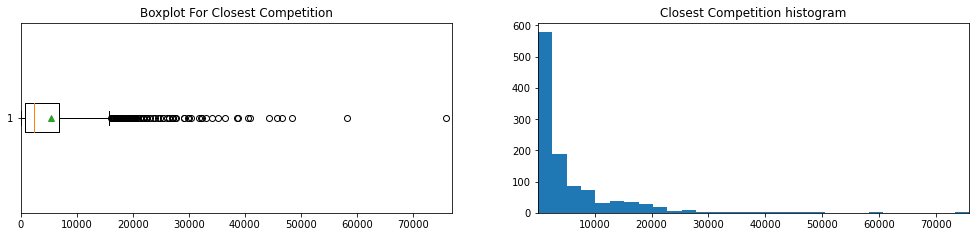

In [39]:
df_store_check_distribution=df_store.drop(df_store[pd.isnull(df_store.CompetitionDistance)].index)
fig, axes = plt.subplots(1, 2, figsize=(17,3.5))
axes[0].boxplot(df_store_check_distribution.CompetitionDistance, showmeans=True,vert=False,)
axes[0].set_xlim(0,max(df_store_check_distribution.CompetitionDistance+1000))
axes[0].set_title('Boxplot For Closest Competition')
axes[1].hist(df_store_check_distribution.CompetitionDistance, cumulative=False, bins=30)
axes[1].set_title("Closest Competition histogram")
axes[1].set_xlim((min(df_store_check_distribution.CompetitionDistance), max(df_store_check_distribution.CompetitionDistance)))
{"Mean":np.nanmean(df_store.CompetitionDistance),"Median":np.nanmedian(df_store.CompetitionDistance),"Standard Dev":np.nanstd(df_store.CompetitionDistance)}

We see a highly right skewed distribution for this variable with a significant difference between the mean and the median. This being caused by the amount of disperness in the data with a standard deviation of 7659, higher than the mean and the median.

###### Solution:
    * It is realistically better to input the median value to the three Nan stores then the mean since the mean is biased by those outliers.

In [40]:
df_store['CompetitionDistance'].fillna(df_store['CompetitionDistance'].median(), inplace = True)

###### 2) CompetitionOpenSinceMonth and CompetitionOpenSinceYear?
    * Since we have no information whatsoever on those missing values and no accurate way of filling those values.
    * So for this purpose those fields are going to be assigned to 0 .

In [41]:
df_store.CompetitionOpenSinceMonth.fillna(0, inplace = True)
df_store.CompetitionOpenSinceYear.fillna(0,inplace=True)

###### 3) Promo2SinceWeek, Promo2SinceYear and PromoInterval ?

In [42]:

df_store[pd.isnull(df_store.Promo2SinceWeek)& (df_store.Promo2==0)]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
5,6,a,a,310.0,12.0,2013.0,0,NaN,NaN,NaN
6,7,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1107,1108,a,a,540.0,4.0,2004.0,0,NaN,NaN,NaN
1109,1110,c,c,900.0,9.0,2010.0,0,NaN,NaN,NaN
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,0.0,0.0,0,NaN,NaN,NaN


###### Findings:
    *This case is pretty straighforward, all the missing values comes from fields where Promo2=0 which means there are no continuous promotional activities for those stores.
    * Having no promotion means those fields have to be 0 as well since they are linked to Promo2.

In [43]:
df_store.Promo2SinceWeek.fillna(0,inplace=True)
df_store.Promo2SinceYear.fillna(0,inplace=True)
df_store.PromoInterval.fillna(0,inplace=True)

In [44]:
df_store.count(0)/df_store.shape[0] * 100

Store                        100.0
StoreType                    100.0
Assortment                   100.0
CompetitionDistance          100.0
CompetitionOpenSinceMonth    100.0
CompetitionOpenSinceYear     100.0
Promo2                       100.0
Promo2SinceWeek              100.0
Promo2SinceYear              100.0
PromoInterval                100.0
dtype: float64

#### Now that we are done with clearing missing values, let's merge the two datasets.

In [45]:
#Left-join the train to the store dataset since .Why?
#Because you want to make sure you have all events even if some of them don't have their store information ( which shouldn't happen)
df_train_store = pd.merge(df_train, df_store, how = 'left', on = 'Store')

print ("The Train_Store dataset has {} Rows and {} Variables".format(str(df_train_store.shape[0]),str(df_train_store.shape[1]))) 

The Train_Store dataset has 844338 Rows and 18 Variables


In [46]:
df_train_store.head() 

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0


In [47]:
df_train_store.to_csv('../data/CleanStoreTrain.csv',index=False)

In [48]:
df_train.to_csv('../data/train.csv',index=False)

In [49]:
df_store.to_csv('../data/store.csv',index=False)

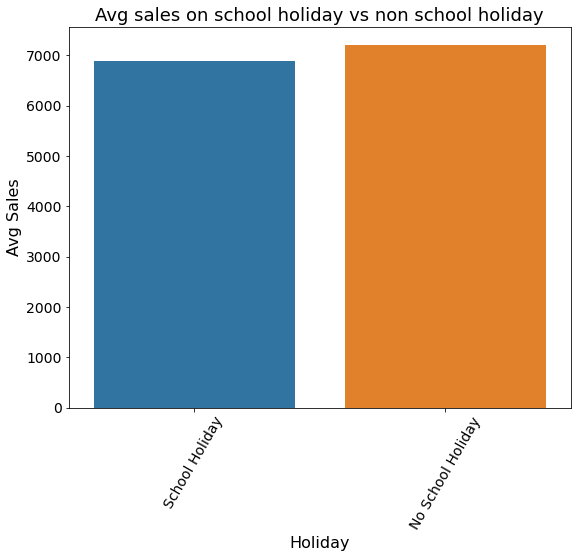

In [52]:
school_df_agg = df_train_store.groupby("SchoolHoliday").agg({"Sales": "mean"}).rename(index={0: "School Holiday", 1:"No School Holiday"})
plot_bar(school_df_agg, school_df_agg.index, "Sales", "Avg sales on school holiday vs non school holiday",
               "Holiday", "Avg Sales")


- the overall avg sales non school holiday is a little bit higher

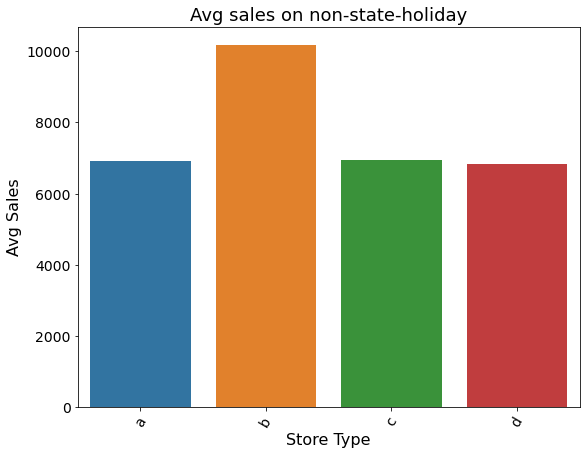

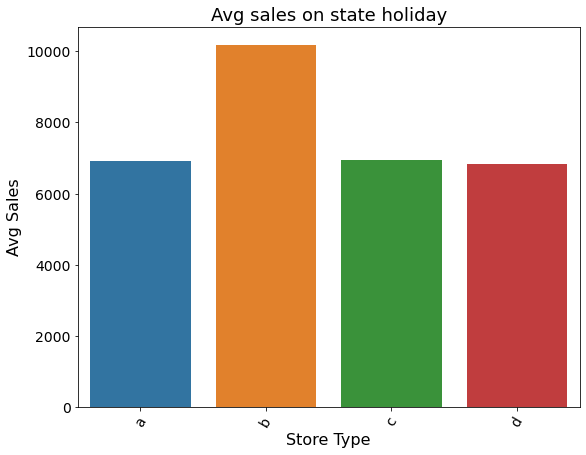

In [53]:
no_state_holday = df_train_store.query("not (StateHoliday != 0 & StateHoliday != '0')")
state_holday_df = df_train_store.query("StateHoliday == 0 | StateHoliday == '0'")

no_state_holiday_agg = no_state_holday.groupby("StoreType").agg({"Sales": "mean"})
state_holday_df_agg = state_holday_df.groupby("StoreType").agg({"Sales": "mean"})



plot_bar(no_state_holiday_agg, no_state_holiday_agg.index, "Sales", "Avg sales on non-state-holiday",
               "Store Type", "Avg Sales")

plot_bar(state_holday_df_agg, state_holday_df_agg.index, "Sales", "Avg sales on state holiday",
               "Store Type", "Avg Sales")

In [58]:
#because the stateholiday has two types of 0's (one is string and the other is int) we need to change it to the same data format
df_train_store['StateHoliday'] = df_train_store['StateHoliday'].astype('str')

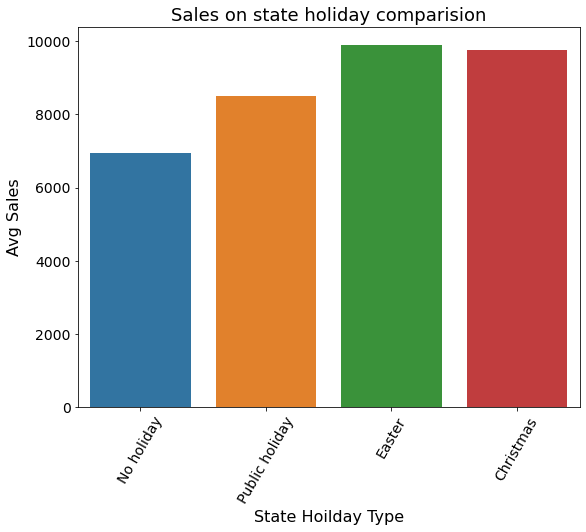

,Sales
StateHoliday,
No holiday,6953.960229
Public holiday,8487.471182
Easter,9887.889655
Christmas,9743.746479


In [59]:
state_hoilday_comparsion = df_train_store.groupby("StateHoliday").agg({"Sales": "mean"})
state_hoilday_comparsion = state_hoilday_comparsion.rename(index={"0": "No holiday", "a": "Public holiday",
                                                                    "b": "Easter", "c": "Christmas"})

plot_bar(state_hoilday_comparsion, state_hoilday_comparsion.index, "Sales", "Sales on state holiday comparision",
               "State Hoilday Type", "Avg Sales")
state_hoilday_comparsion


### Store Type Analysis:

The best way to asses the performance of a store type is to see what is the sales per customer so that we normalize everything and we get the store that makes its customers spend the most on average.

Let's compare first the total sales of each store type, its average sales and then see how it changes when we add the customers to the equation:

In [ ]:
df_train_store['SalesperCustomer']=df_train_store['Sales']/df_train_store['Customers']

In [ ]:
df_train_store.head()

In [ ]:
fig, axes = plt.subplots(2, 3,figsize=(17,10) )
palette = itertools.cycle(sns.color_palette(n_colors=4))
plt.subplots_adjust(hspace = 0.28)
#axes[1].df_train_store.groupby(by="StoreType").count().Store.plot(kind='bar')
axes[0,0].bar(df_store.groupby(by="StoreType").count().Store.index,df_store.groupby(by="StoreType").count().Store,color=[next(palette),next(palette),next(palette),next(palette)])
axes[0,0].set_title("Number of Stores per Store Type \n Fig 1.1")
axes[0,1].bar(df_train_store.groupby(by="StoreType").sum().Sales.index,df_train_store.groupby(by="StoreType").sum().Sales/1e9,color=[next(palette),next(palette),next(palette),next(palette)])
axes[0,1].set_title("Total Sales per Store Type (in Billions) \n Fig 1.2")
axes[0,2].bar(df_train_store.groupby(by="StoreType").sum().Customers.index,df_train_store.groupby(by="StoreType").sum().Customers/1e6,color=[next(palette),next(palette),next(palette),next(palette)])
axes[0,2].set_title("Total Number of Customers per Store Type (in Millions) \n Fig 1.3")
axes[1,0].bar(df_train_store.groupby(by="StoreType").sum().Customers.index,df_train_store.groupby(by="StoreType").Sales.mean(),color=[next(palette),next(palette),next(palette),next(palette)])
axes[1,0].set_title("Average Sales per Store Type \n Fig 1.4")
axes[1,1].bar(df_train_store.groupby(by="StoreType").sum().Customers.index,df_train_store.groupby(by="StoreType").Customers.mean(),color=[next(palette),next(palette),next(palette),next(palette)])
axes[1,1].set_title("Average Number of Customers per Store Type \n Fig 1.5")
axes[1,2].bar(df_train_store.groupby(by="StoreType").sum().Sales.index,df_train_store.groupby(by="StoreType").SalesperCustomer.mean(),color=[next(palette),next(palette),next(palette),next(palette)])
axes[1,2].set_title("Average Spending per Customer in each Store Type \n Fig 1.6")
plt.show()

#### Findings

    * From this training set we can see that Storetype A has the highest number of branches,sales and customers from the 4  different storetypes.
    * From this training set we can see that Storetype A has the highest number of branches,sales and customers from the 4  different storetypes.
    * it is StoreType D who has the highest average spending per Customer,

### Assortment

In [ ]:
StoretypeXAssortment = sns.countplot(x="StoreType",hue="Assortment",order=["a","b","c","d"], data=df_store,palette=sns.color_palette("Set2", n_colors=3)).set_title("Number of Different Assortments per Store Type")
df_store.groupby(by=["StoreType","Assortment"]).Assortment.count()

In [ ]:
fig, axes = plt.subplots(2, 3,figsize=(17,10) )
palette = itertools.cycle(sns.color_palette(n_colors=4))
plt.subplots_adjust(hspace = 0.28)
#axes[1].df_train_store.groupby(by="StoreType").count().Store.plot(kind='bar')
axes[0,0].bar(df_store.groupby(by="Assortment").count().Store.index,df_store.groupby(by="Assortment").count().Store,color=[next(palette),next(palette),next(palette),next(palette)])
axes[0,0].set_title("Number of Stores per Assortment \n Fig 2.1")
axes[0,1].bar(df_train_store.groupby(by="Assortment").sum().Sales.index,df_train_store.groupby(by="Assortment").sum().Sales/1e9,color=[next(palette),next(palette),next(palette),next(palette)])
axes[0,1].set_title("Total Sales per Assortment (in Billions) \n Fig 2.2")
axes[0,2].bar(df_train_store.groupby(by="Assortment").sum().Customers.index,df_train_store.groupby(by="Assortment").sum().Customers/1e6,color=[next(palette),next(palette),next(palette),next(palette)])
axes[0,2].set_title("Total Number of Customers per Assortment (in Millions) \n Fig 2.3")
axes[1,0].bar(df_train_store.groupby(by="Assortment").sum().Customers.index,df_train_store.groupby(by="Assortment").Sales.mean(),color=[next(palette),next(palette),next(palette),next(palette)])
axes[1,0].set_title("Average Sales per Assortment Type \n Fig 2.4")
axes[1,1].bar(df_train_store.groupby(by="Assortment").sum().Customers.index,df_train_store.groupby(by="Assortment").Customers.mean(),color=[next(palette),next(palette),next(palette),next(palette)])
axes[1,1].set_title("Average Number of Customers per Assortment Type \n Fig 2.5")
axes[1,2].bar(df_train_store.groupby(by="Assortment").sum().Sales.index,df_train_store.groupby(by="Assortment").SalesperCustomer.mean(),color=[next(palette),next(palette),next(palette),next(palette)])
axes[1,2].set_title("Average Spending per Customer in each Assortment Type \n Fig 2.6")
plt.show()

#### Findings
    * We can clearly see here that most of the stores have either a assortment type or c assortment type.
    * Interestingly enough StoreType d which has the highest Sales per customer average actually has mostly c assortment type, this is most probably the reason for having this high average in Sales per customer.Having variery in stores always increases the customers spending pattern.
    *Another important factor here is the fact that store type b is the only one who has the b assortment type and a lot of them actually which stands for "extra" and by looking at fig 1.4 and 1.5 he's the one who has the highest number of customers and sales. Probably this formula of extra is the right middlepoint for customers between not too much variety like C assortment and not too basic like A assortment and this is what is driving the high traffic in this store.

### Promotion:

In [ ]:
df_train_store['Date']=pd.to_datetime(df_train_store['Date'],errors='coerce')

In [ ]:
df_train_store['Month']=df_train_store.Date.dt.month
df_train_store['Year']=df_train_store.Date.dt.year

In [ ]:
df_train_store.head()

In [ ]:
sns.factorplot(data = df_train_store, x ="Month", y = "Sales", 
               col = 'Promo', # per store type in cols
               hue = 'Promo2',
               row = "Year"
              ,sharex=False)

In [ ]:
sns.factorplot(data = df_train_store, x ="Month", y = "SalesperCustomer", 
               col = 'Promo', # per store type in cols
               hue = 'Promo2',
               row = "Year"
              ,sharex=False)

In [ ]:
sns.factorplot(data = df_train_store, x ="DayOfWeek", y = "Sales",
                hue='Promo'
              ,sharex=False)

#### Findings:
    * We see the dramatic change when we compare having promotion Promo=1 to not having promotion Promo=0 and can conclude that a store that have promotion on a given day changes its amount of sales considerably.
    * But Surprisingly, when we check more granularly at the Promo2 variable (indicating a contunious promotion blue vs orange) we see that in general when there is no consecutive promotion stores tend to sell more then with consecutive promotion. This is probably a solution they're putting in place to treat stores with very low sales in the first place. And indeed when checking the Sales per Customer over promotion we understand that initially those stores suffer from low sales and those continuous promotion shows a tremending increase in the buying power of customers.
    * If we look over the years,there is a slight increase Year over Year but we don't see any major change from 2013 to 2015 and we actually see a very similair pattern in the months over the years with major spikes first around Easter period in March and April then in Summer in May,June and July and then finally around the Christmas period in November and December.
    * We see already a big difference again even on a week level (from Monday to Friday) when we seperate promotion and no promotion.We see there are no promotions during the weekend.

In [ ]:
print ("Number of Stores opened on Sundays:{}" .format(df_train_store[(df_train_store.Open == 1) & (df_train_store.DayOfWeek == 7)]['Store'].unique().shape[0]))

In [ ]:
sns.factorplot(data = df_train_store, x ="DayOfWeek", y = "Sales",
              sharex=False)

#### Findings:
    
    * For Sunday to have such a high peak is understandable, since a very few stores opens on Sundays (only 33);if anyone needs anything urgently and don't have the time to get it during the week, he will have to do some distance to get to the open ones even if it's not close to his house. This means that those 33 open stores on Sunday actually accounts for the potential demand if all Rossman Stores were closed on Sundays. This clearly shows us how important it is for stores to be opened on Sundays.
 

In [ ]:
df_train_store['CompetitionDist_Cat']=pd.cut(df_train_store['CompetitionDistance'], 5)

In [ ]:
df_train_store.head()

In [ ]:
df_train_store.groupby(by="CompetitionDist_Cat").Sales.mean(),df_train_store.groupby(by="CompetitionDist_Cat").Customers.mean()

#### Findings:
    * the stores that are the furthest have the highest average sales and number of customers.it does shed light on the fact that when there are no competition nearby, stores tend to sell more and have more customers because there are almost a monopoly in this region.
    

In [ ]:
has_open_competition_df = df_train_store[df_train_store['CompetitionOpenSinceMonth'].notnull()]

has_open_competition_df["CompetitionOpenSinceYear"] = has_open_competition_df["CompetitionOpenSinceYear"].astype("int").astype("str")
has_open_competition_df["CompetitionOpenSinceMonth"] = has_open_competition_df["CompetitionOpenSinceMonth"].astype("int").astype("str")

has_open_competition_df["CompetitionOpenSinceDate"] = has_open_competition_df["CompetitionOpenSinceYear"] + "-" + has_open_competition_df["CompetitionOpenSinceMonth"] + "-" + "01" 
has_open_competition_df["CompetitionOpenSinceDate"] =  pd.to_datetime(has_open_competition_df["CompetitionOpenSinceDate"],errors='coerce')

competition_df = has_open_competition_df[["Date", "Sales", "Store", "CompetitionOpenSinceDate"]]


competition_df["BeforeCompetition"] = competition_df["Date"] < competition_df["CompetitionOpenSinceDate"]

competition_df_agg = competition_df.groupby("BeforeCompetition").agg({"Sales": "mean"})


In [51]:
def plot_bar(df: pd.DataFrame, x_col: str, y_col: str, title: str, xlabel: str, ylabel: str) -> None:
    plt.figure(figsize=(9, 7))
    sns.barplot(data=df, x=x_col, y=y_col)
    plt.title(title, size=18)
    plt.xticks(rotation=60, fontsize=14)
    plt.yticks(fontsize=14)
    plt.xlabel(xlabel, fontsize=16)
    plt.ylabel(ylabel, fontsize=16)
    plt.show()

In [ ]:
x_col = []
for val in competition_df_agg.index.to_list():
    if (val):
        x_col.append("Before")
    else:
        x_col.append("After")

plot_bar(competition_df_agg, x_col,
               "Sales", "Before competition vs After Competition",
               "Before or After ", "Sales")

In [ ]:
print("Overall avg sales before competition and after competition")
display(competition_df_agg)

decrease = competition_df_agg["Sales"][True] - competition_df_agg["Sales"][False]
decrease_percent = decrease / competition_df_agg["Sales"][True]

print(f"Overall avg sales decreased after competition by {decrease_percent * 100:.3f}%")
